### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 240_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,...,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,0.033021,0.236155,0.498365,0.893092,1.553918,7.997700,1.418321,1.050808,1.033417,1.006091,...,1.832867,1.853947,1.593415,1.945968,0.884924,1.561101,1.966717,2.068661,1.977120,51.543275
std,0.013066,0.011956,0.012509,0.018157,0.012755,2.787941,0.270848,0.038209,0.007748,0.001601,...,0.015048,0.016852,0.030277,0.012658,0.030000,0.016524,0.009473,0.001056,0.003112,11.044772
min,0.012910,0.168580,0.453156,0.863475,1.482377,1.461793,1.168436,1.025339,0.986659,0.993300,...,1.776554,1.809458,1.505495,1.832517,0.578782,1.495399,1.946813,2.064292,1.968711,26.400000
25%,0.026452,0.234843,0.489476,0.882343,1.547518,6.582695,1.285231,1.032175,1.029703,1.005935,...,1.824067,1.841863,1.573290,1.938508,0.865736,1.552314,1.959498,2.068223,1.975019,44.000000
50%,0.029393,0.238171,0.496921,0.886945,1.549727,7.169578,1.313233,1.036764,1.031088,1.006266,...,1.834025,1.852462,1.592134,1.946952,0.883885,1.562364,1.966216,2.068840,1.976806,49.700000
75%,0.033139,0.241654,0.504685,0.895127,1.552789,8.144163,1.372244,1.045924,1.032631,1.006536,...,1.843264,1.865682,1.612193,1.954951,0.905177,1.571997,1.972789,2.069347,1.978709,56.300000
max,0.088308,0.355142,0.543621,1.056794,1.592145,42.463484,3.773997,1.446420,1.102898,1.078942,...,1.882685,1.905041,1.703598,1.982567,0.990612,1.604983,1.992924,2.071043,1.990227,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

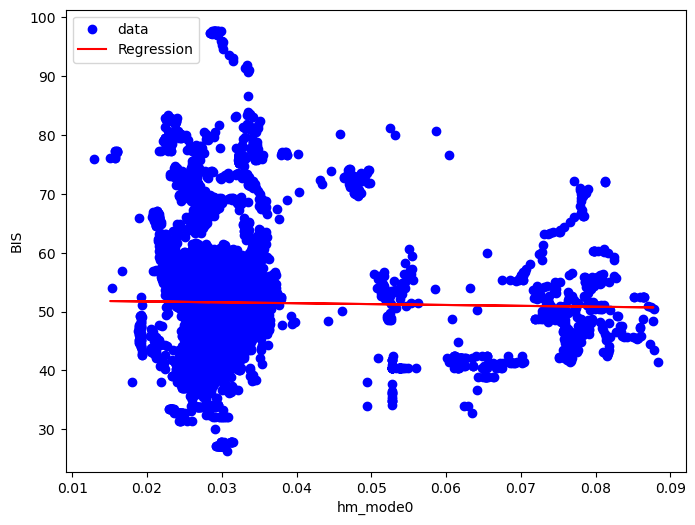

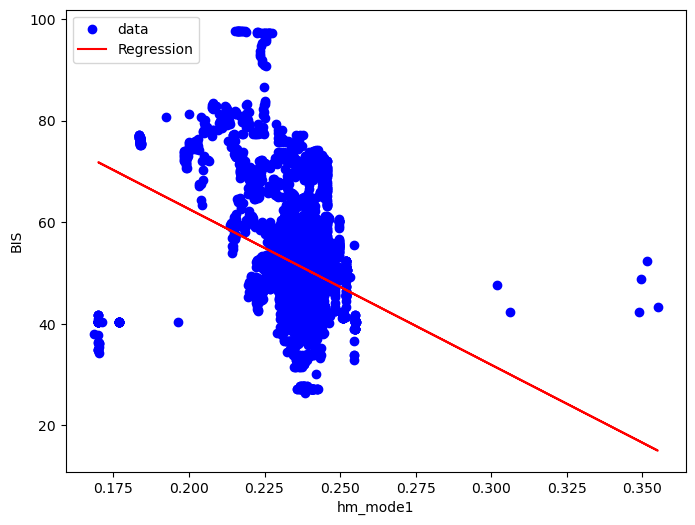

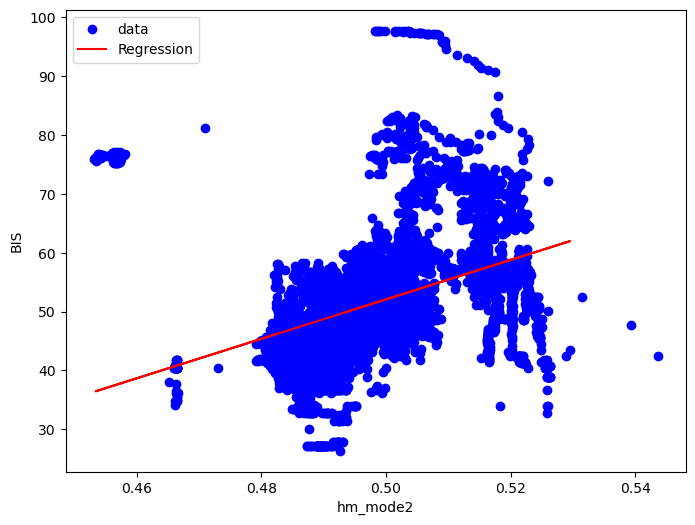

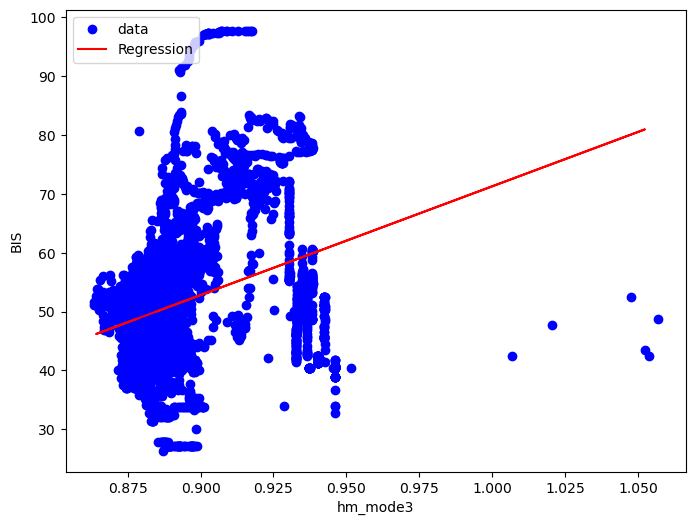

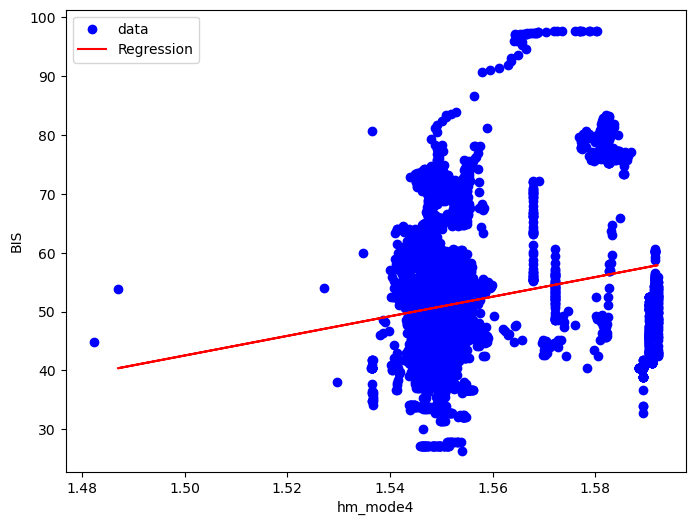

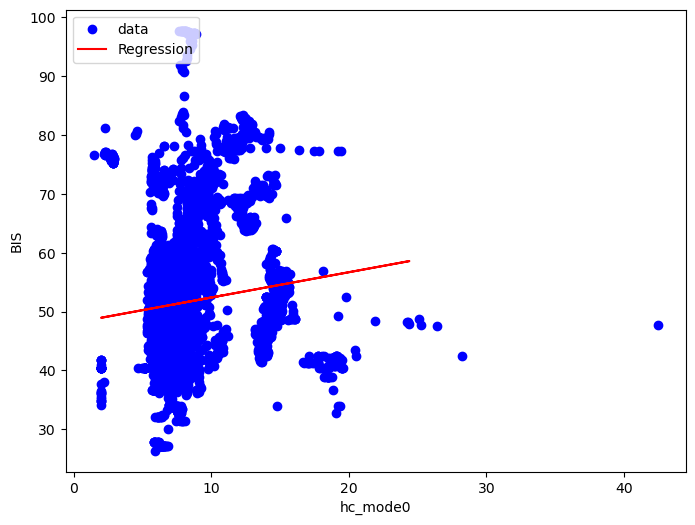

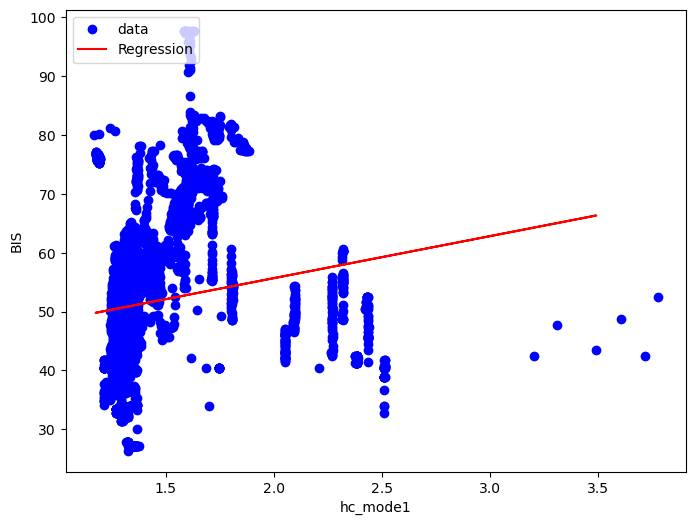

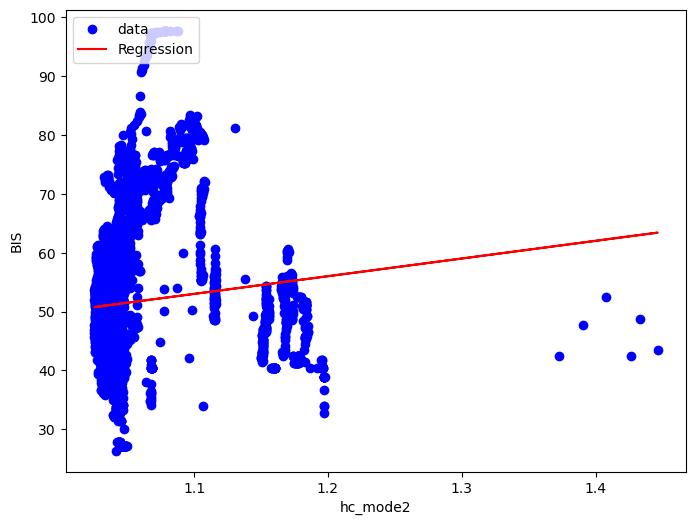

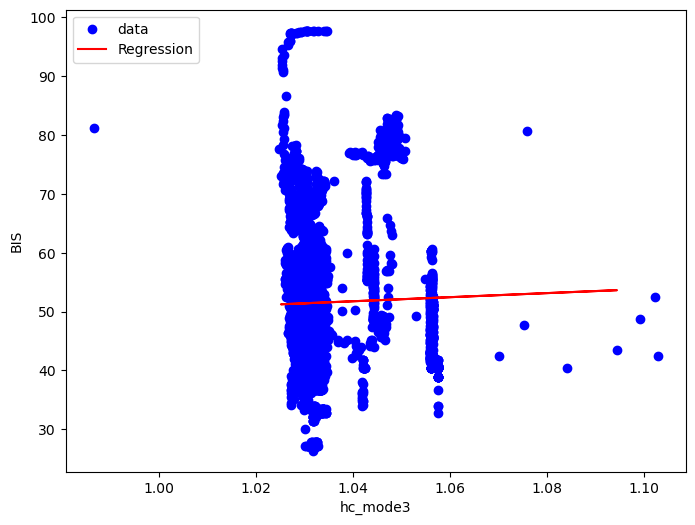

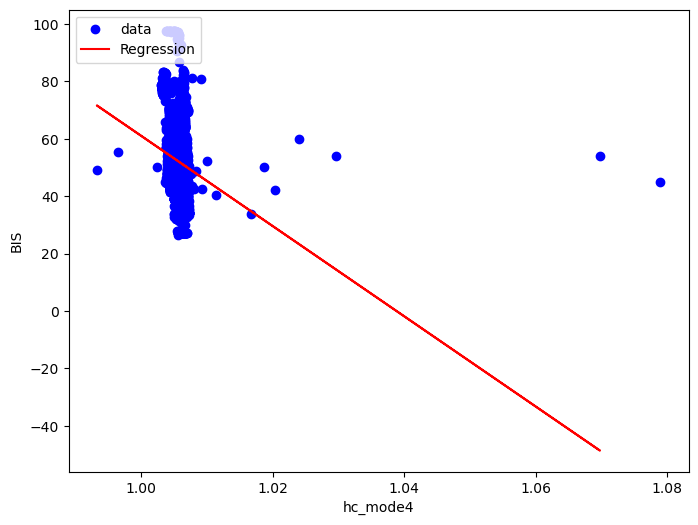

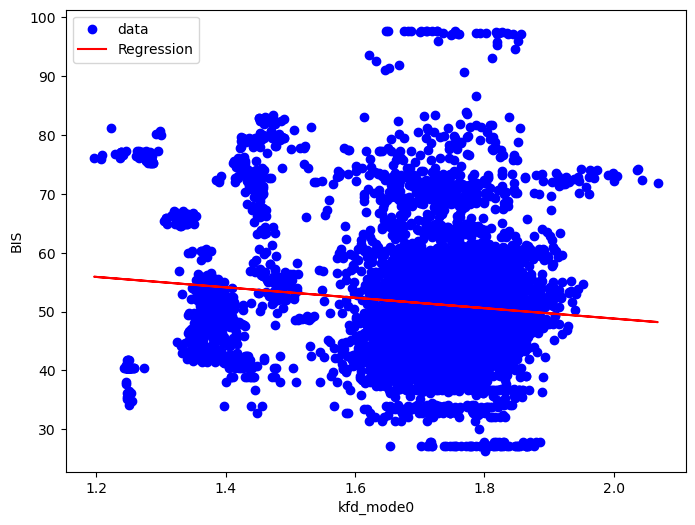

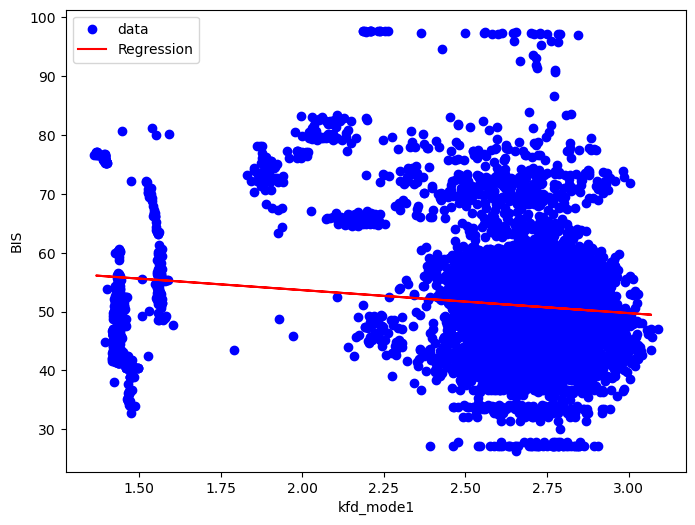

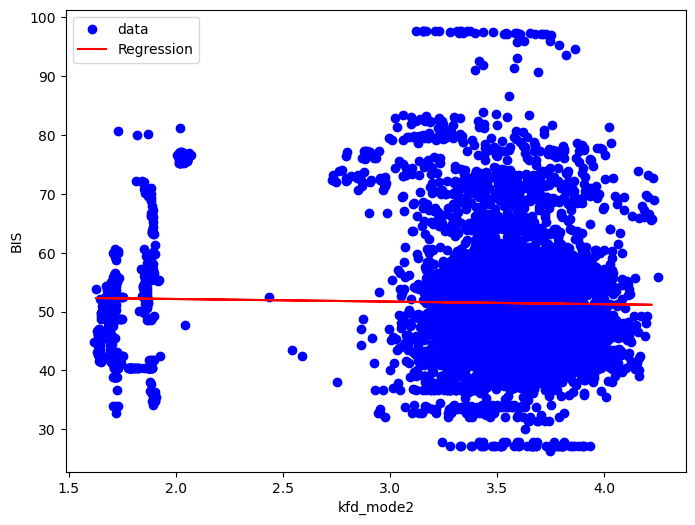

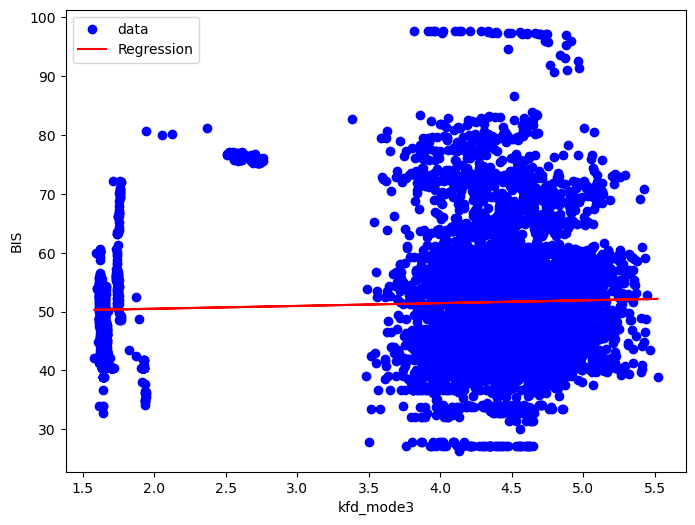

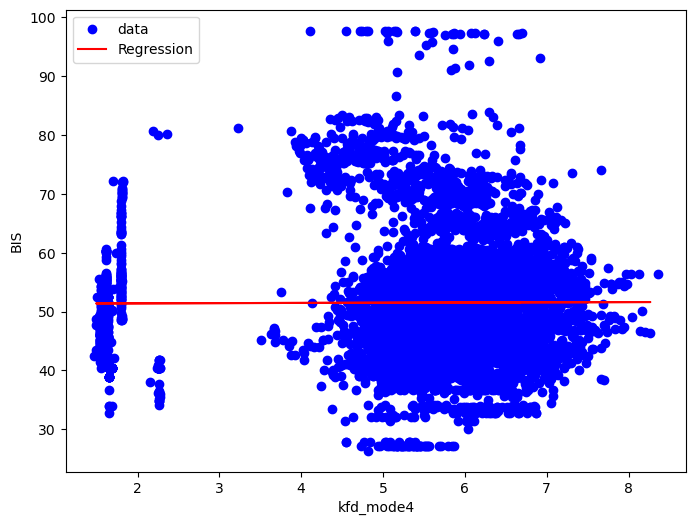

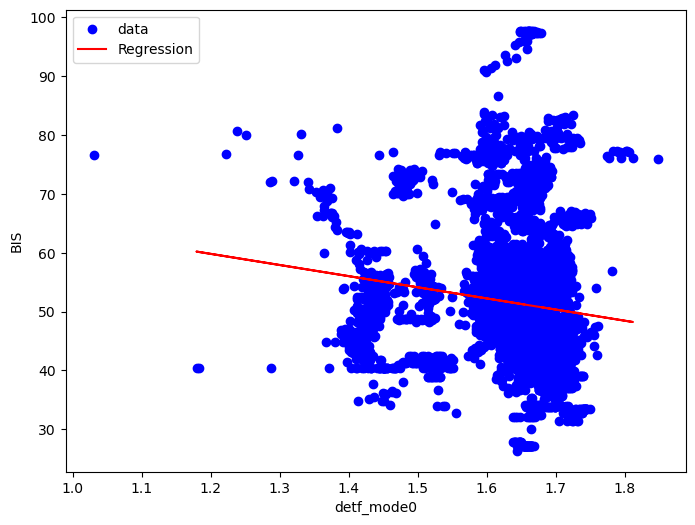

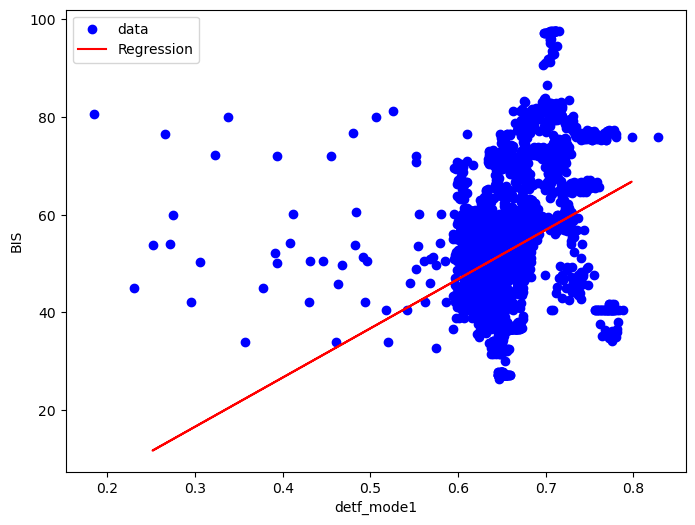

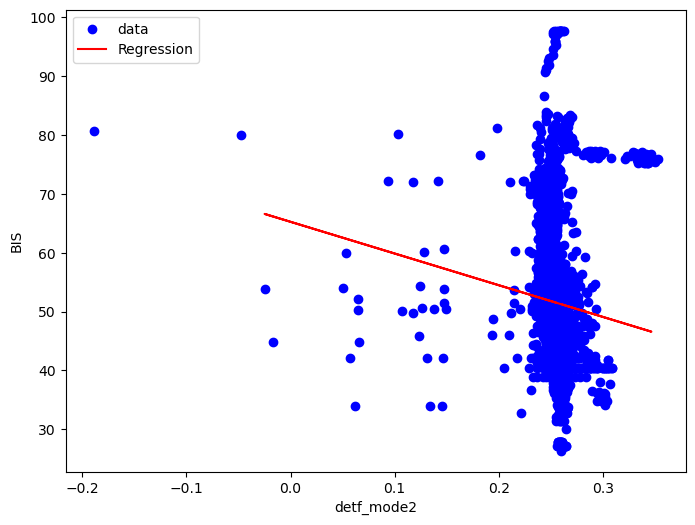

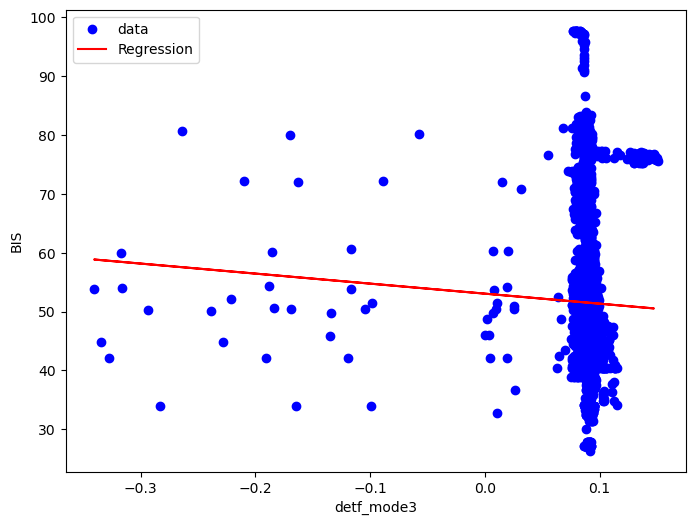

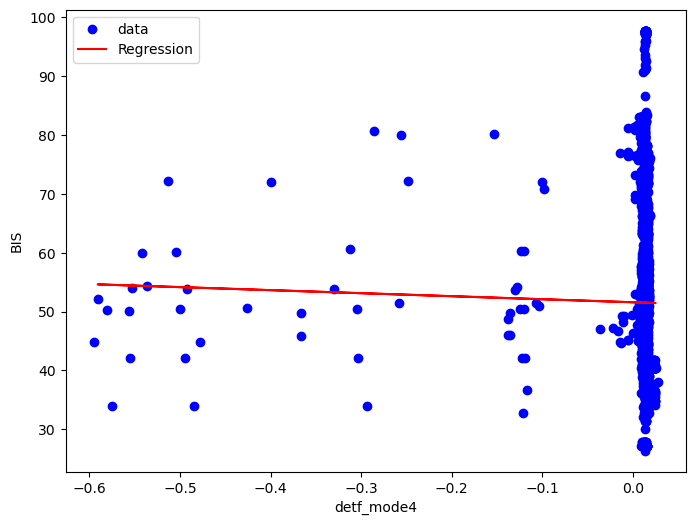

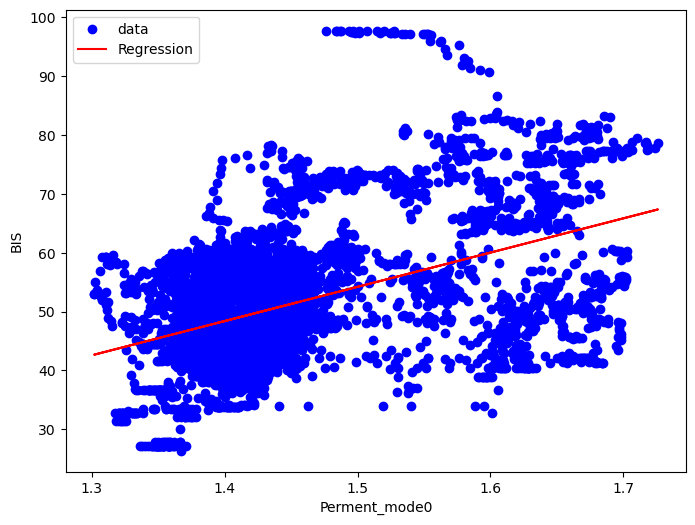

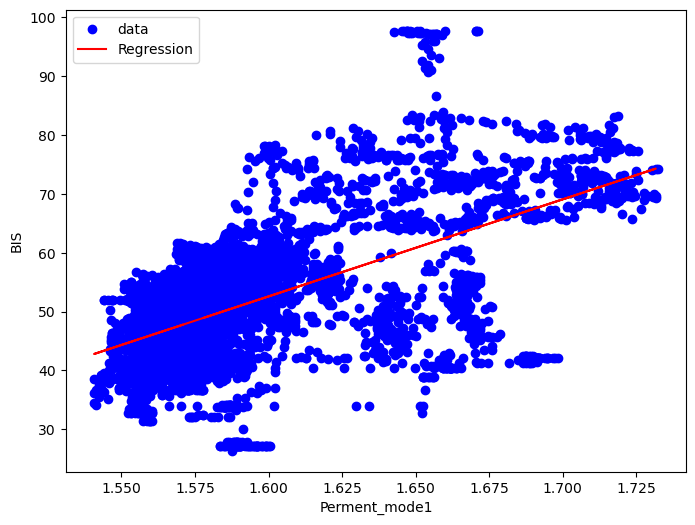

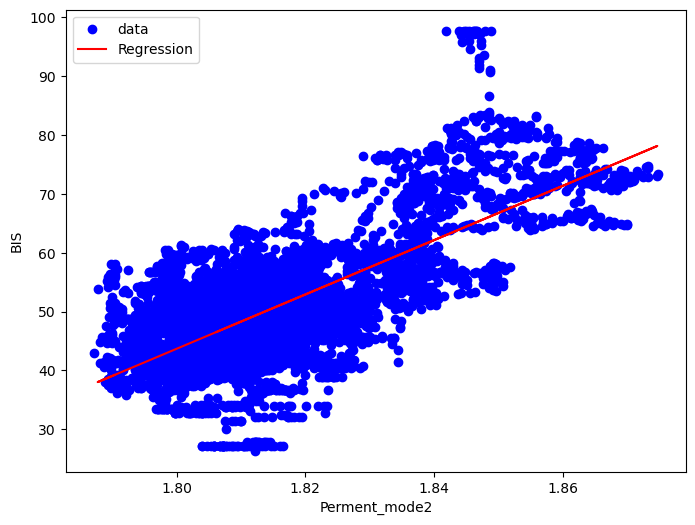

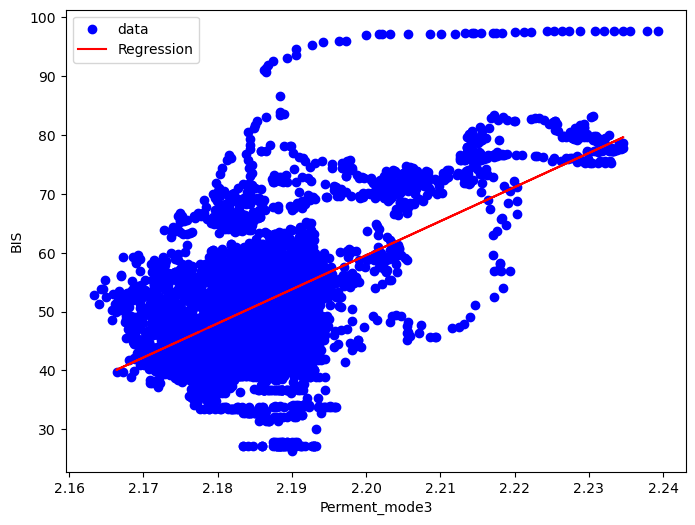

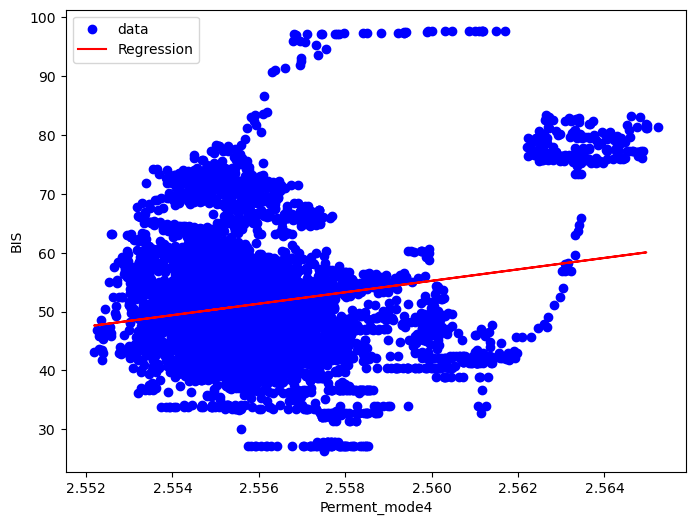

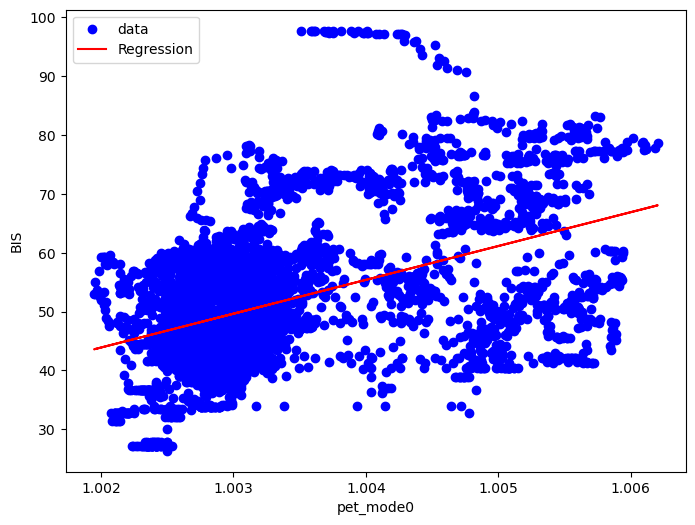

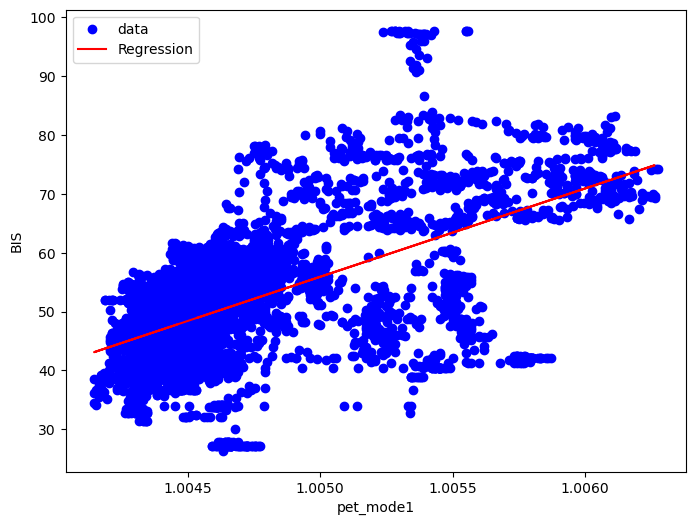

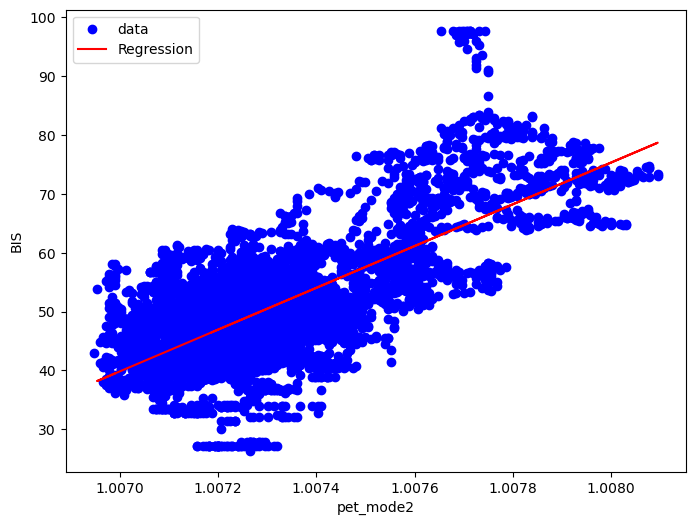

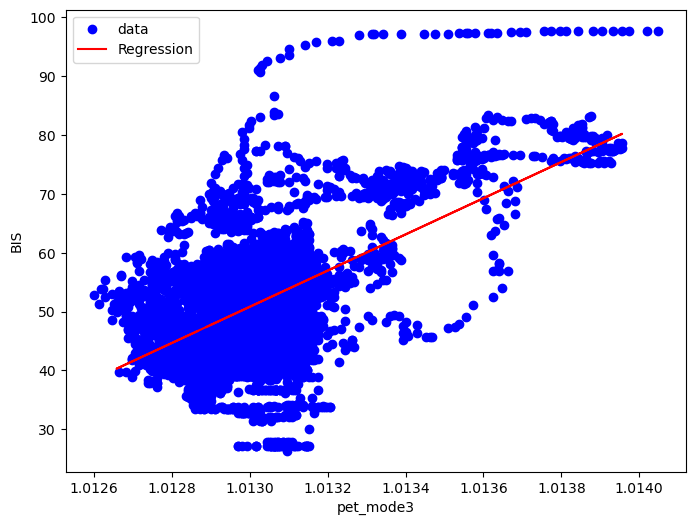

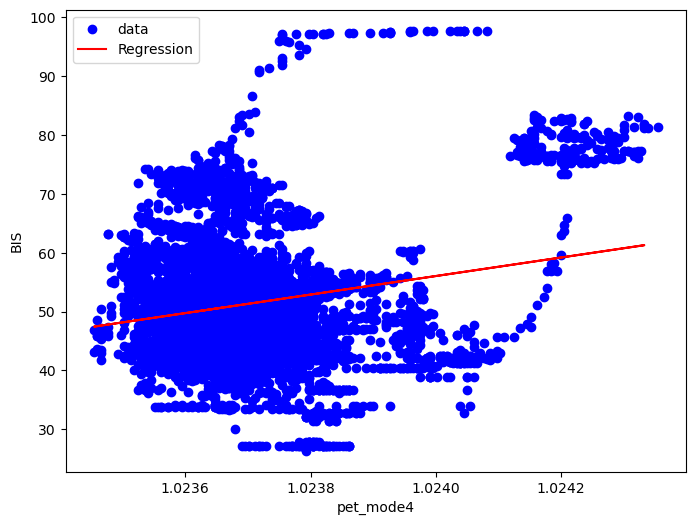

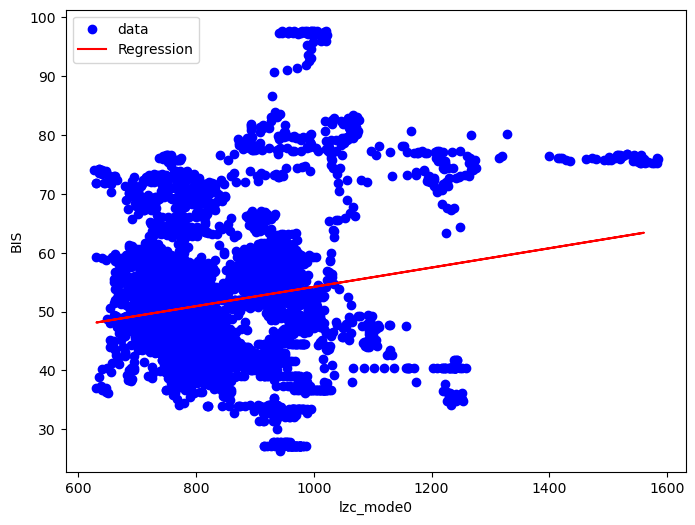

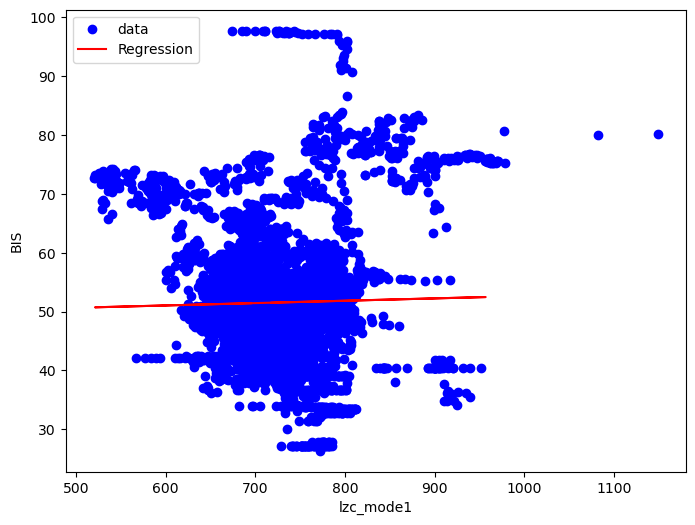

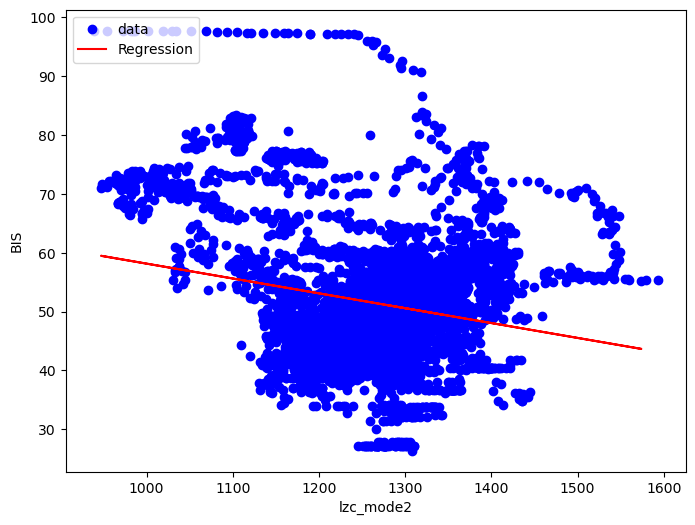

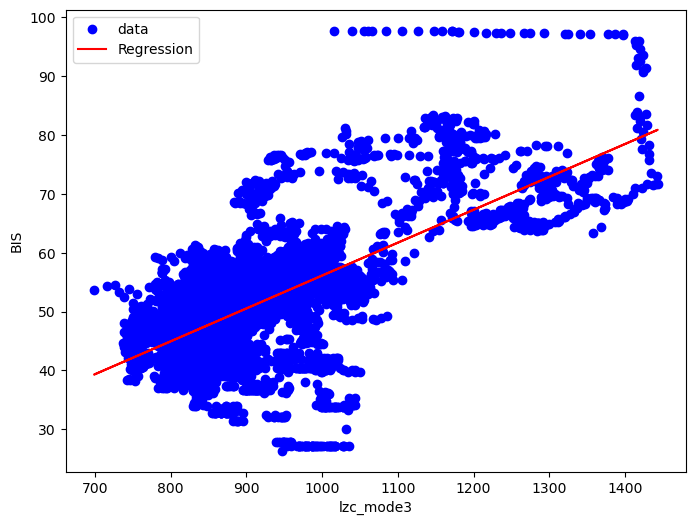

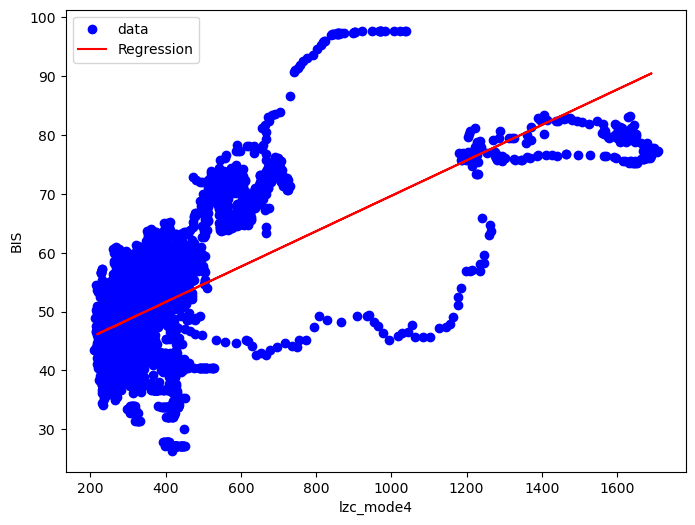

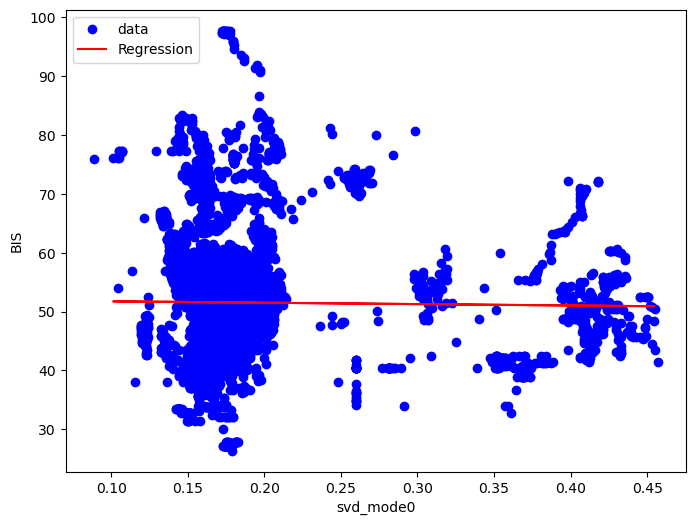

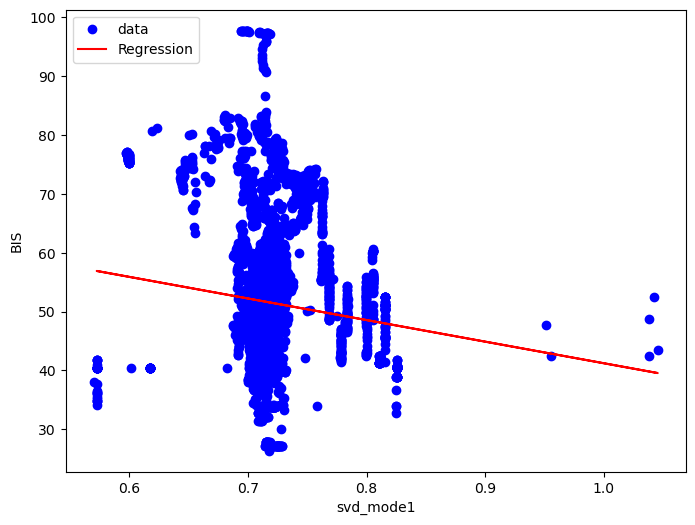

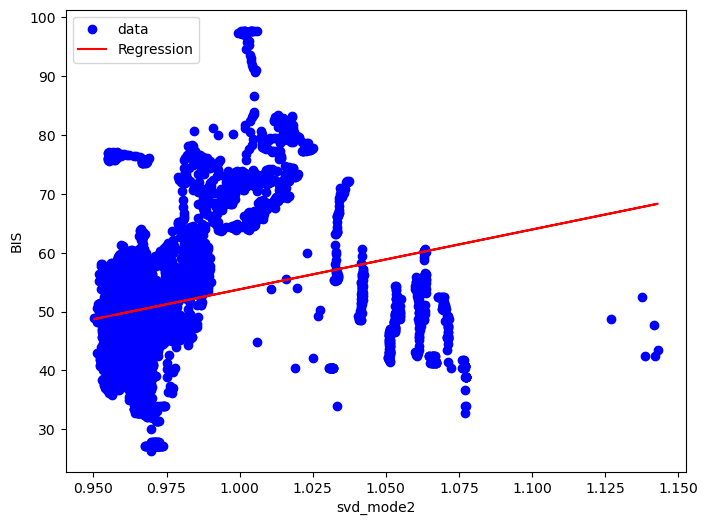

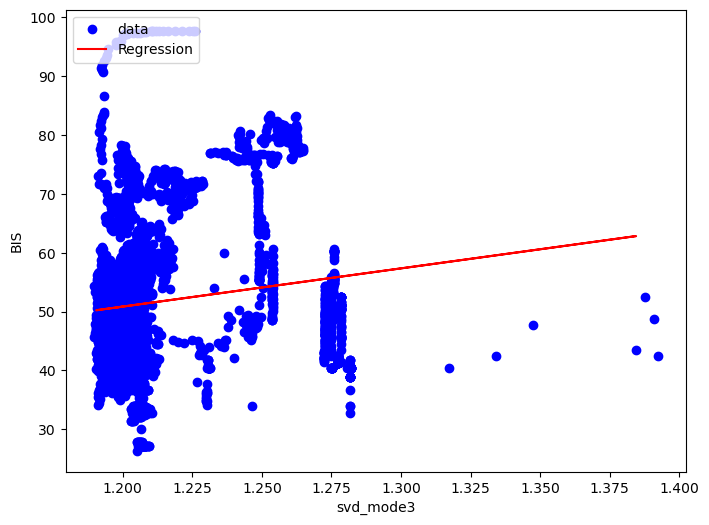

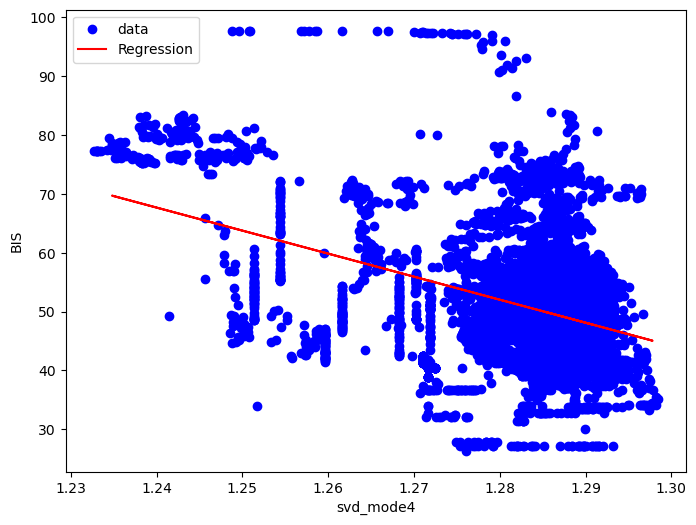

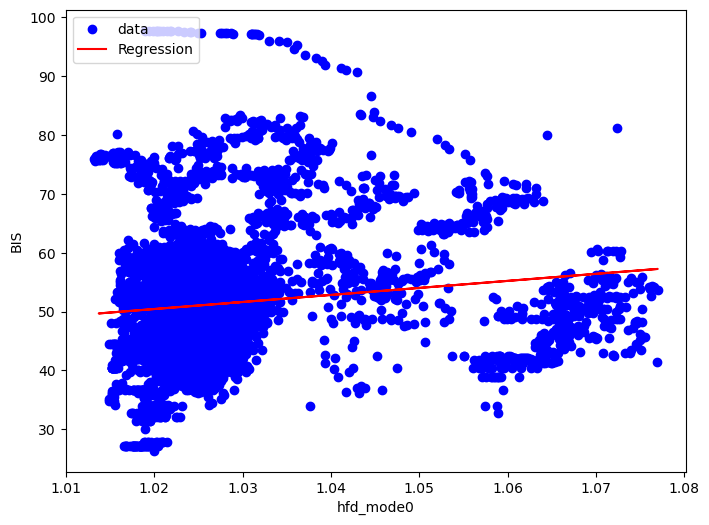

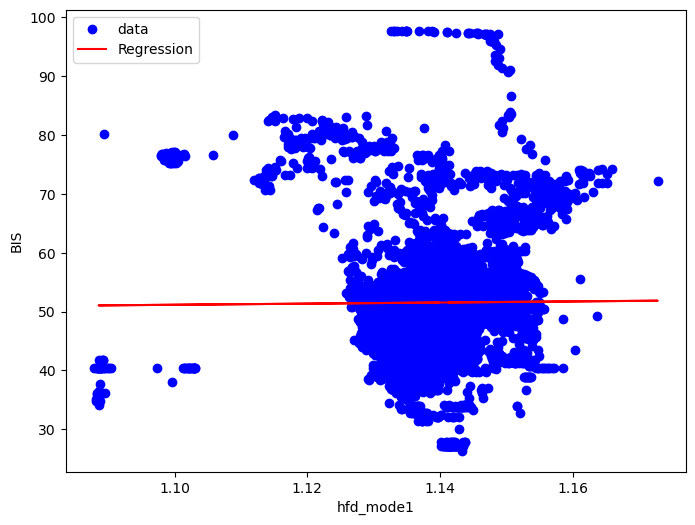

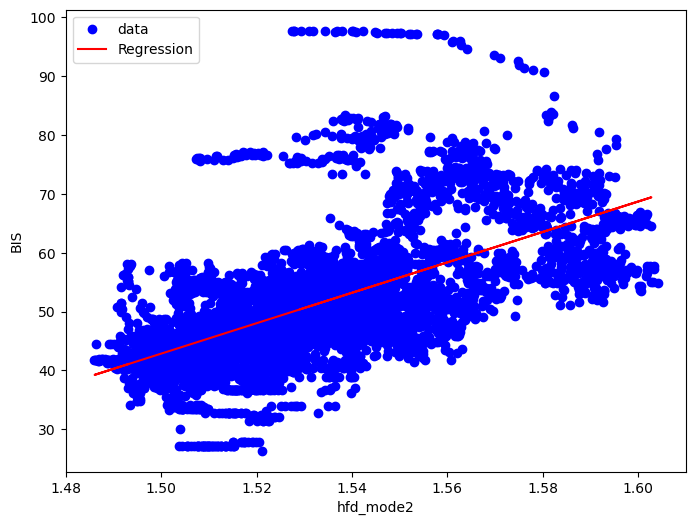

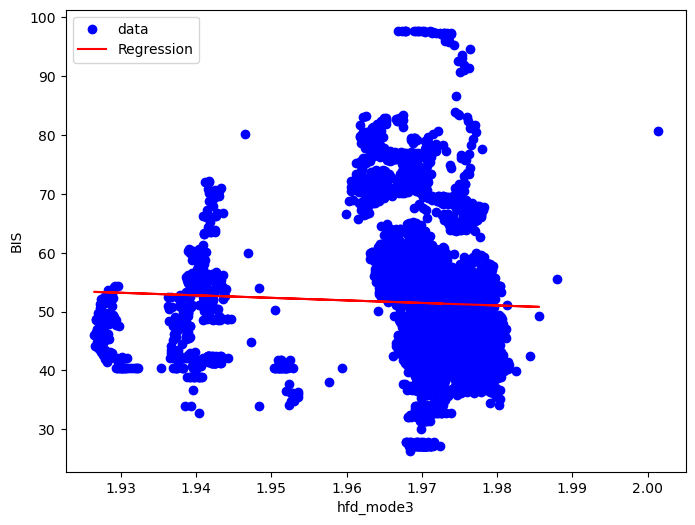

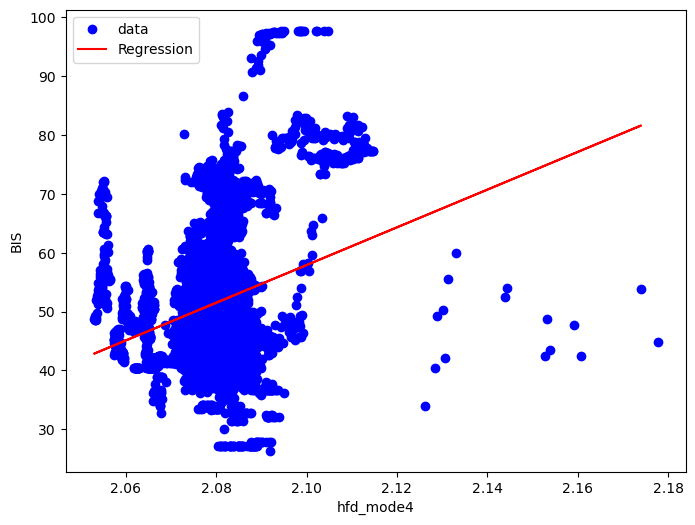

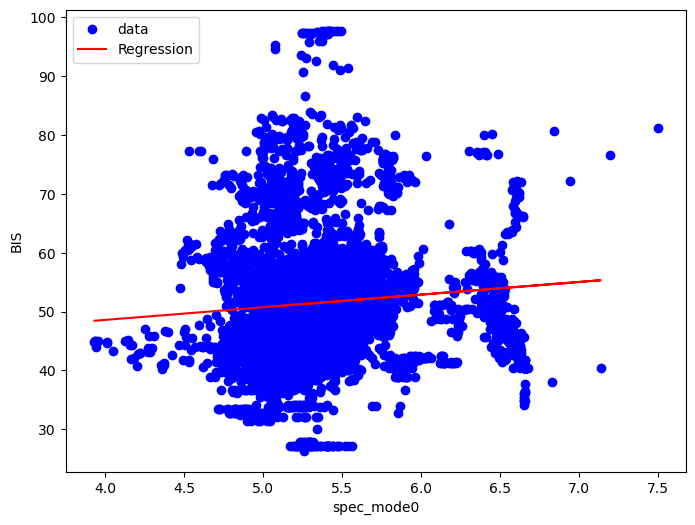

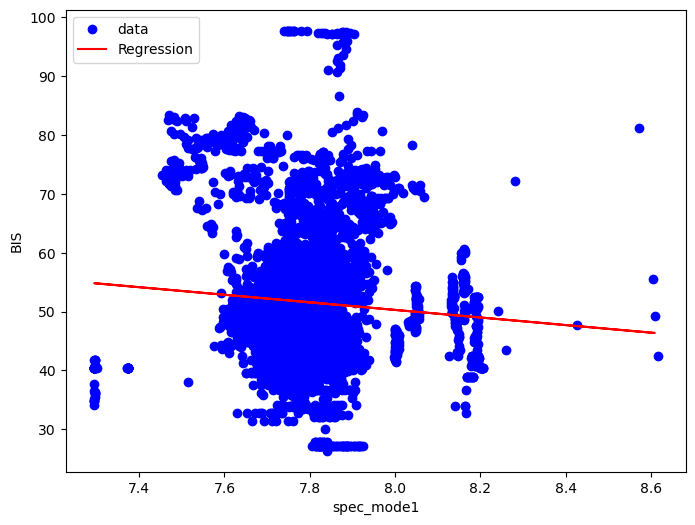

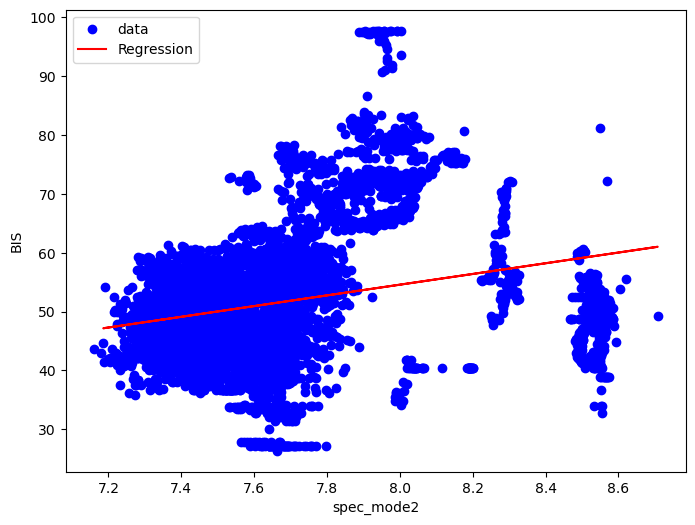

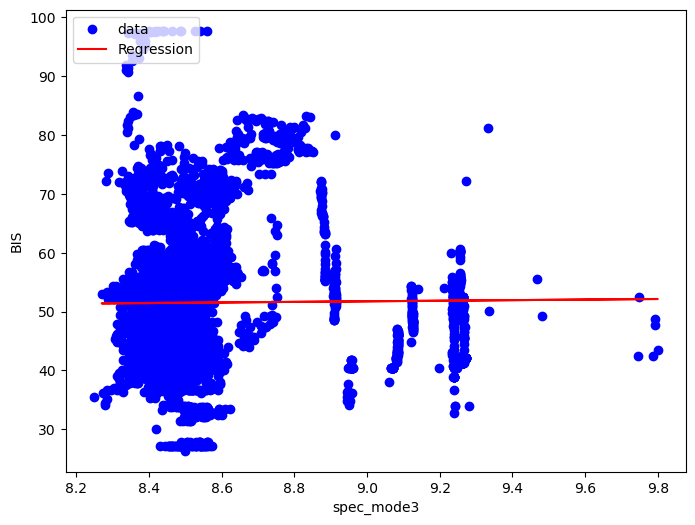

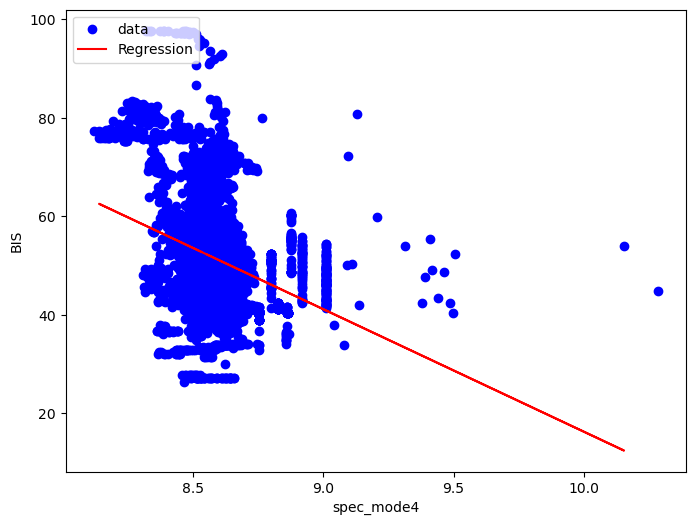

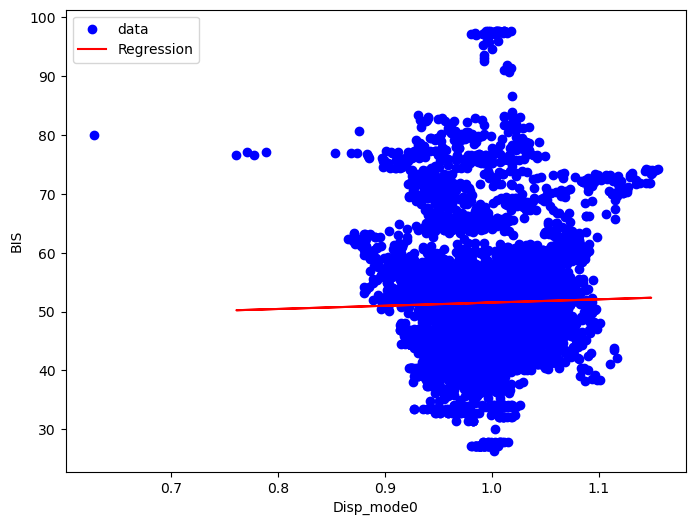

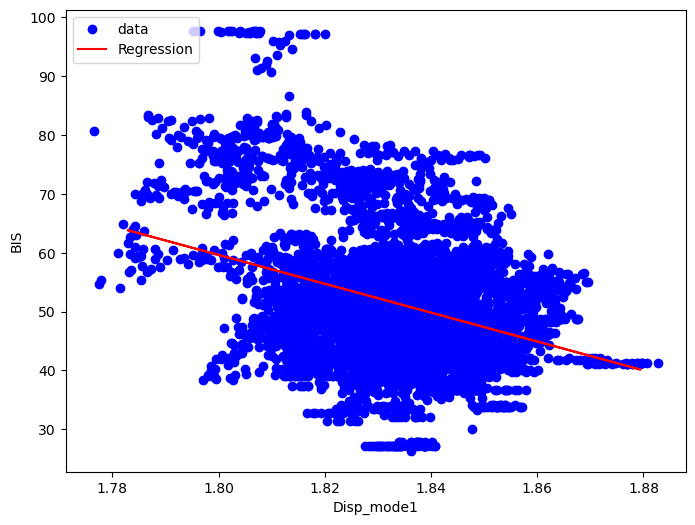

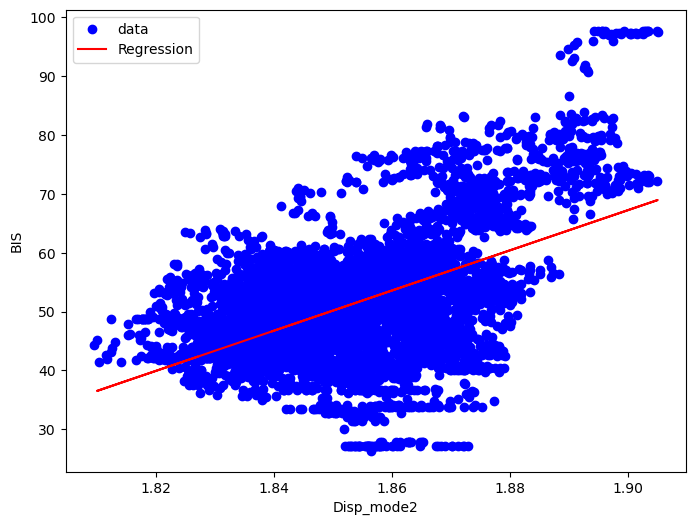

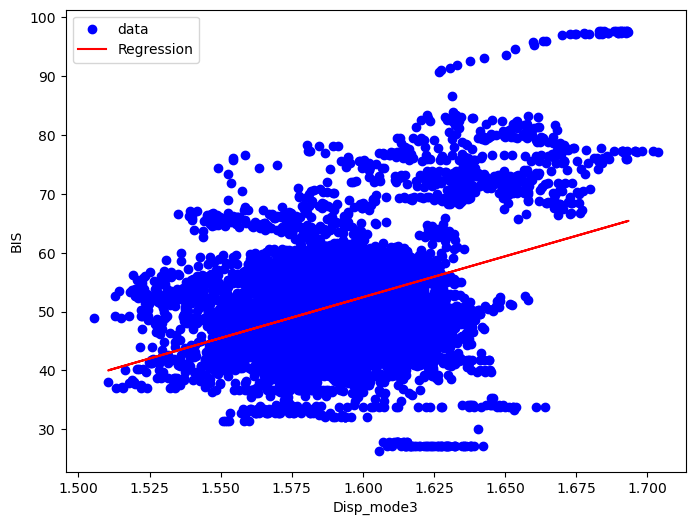

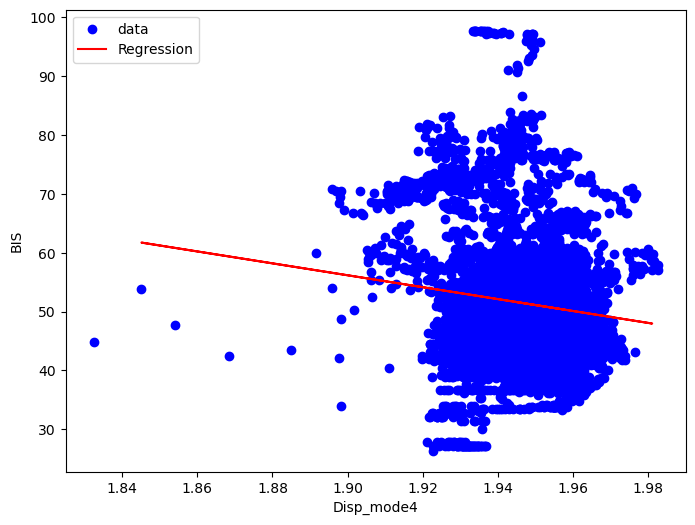

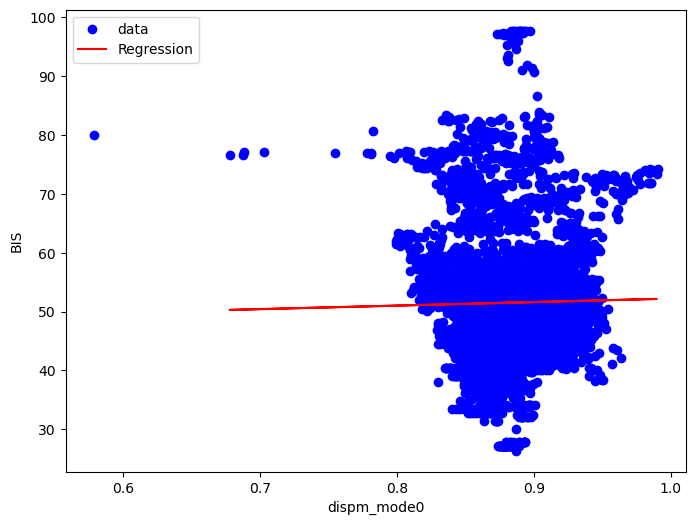

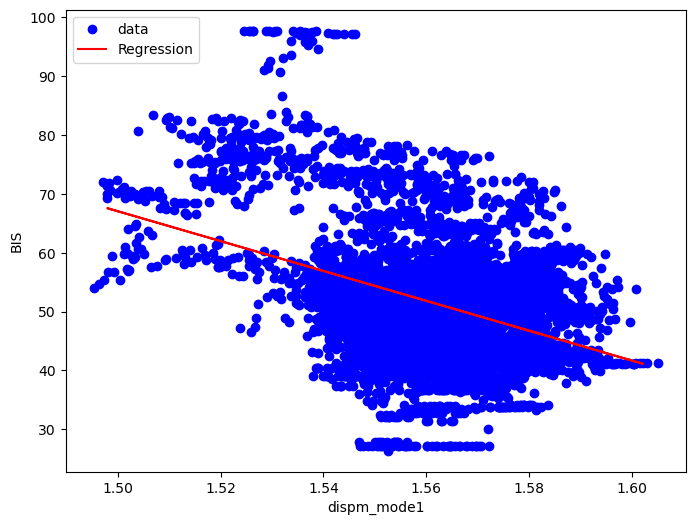

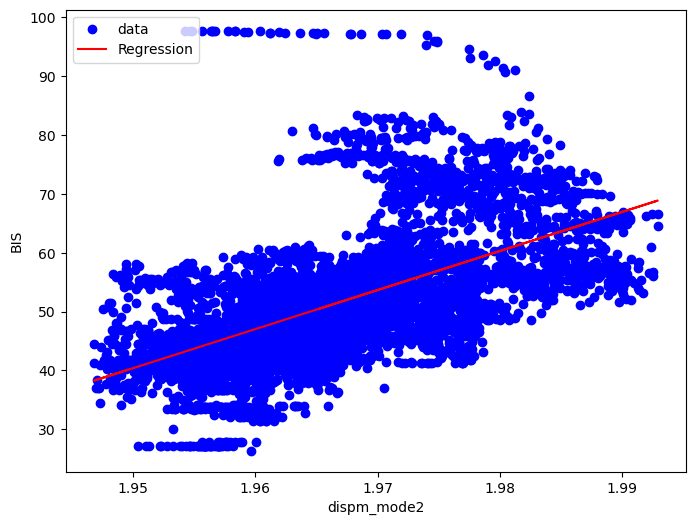

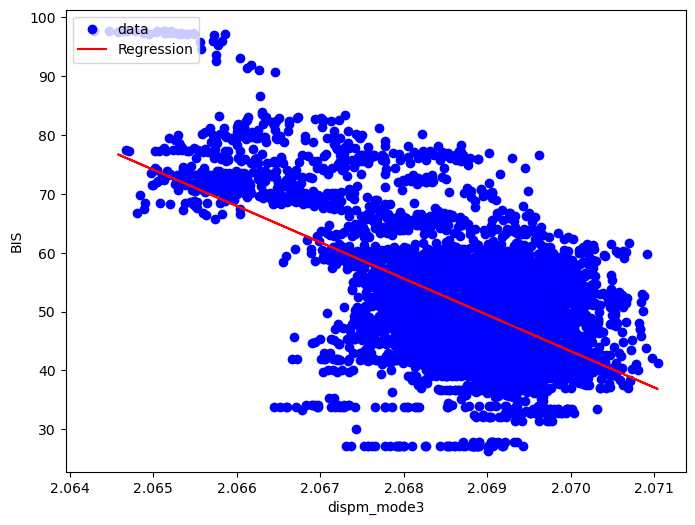

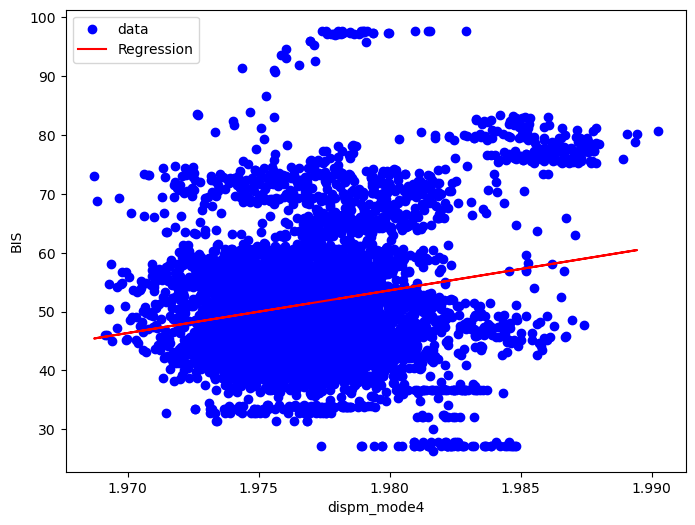

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
27,pet_mode2_r2,52.182507
22,Perment_mode2_r2,51.933145
33,lzc_mode3_r2,43.542780
34,lzc_mode4_r2,42.438877
42,hfd_mode2_r2,36.257709
58,dispm_mode3_r2,36.163872
21,Perment_mode1_r2,35.427467
26,pet_mode1_r2,35.188190
28,pet_mode3_r2,33.510439
57,dispm_mode2_r2,33.332508


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
34      lzc_mode4    0.538390
2        hm_mode2    0.077079
42      hfd_mode2    0.044585
33      lzc_mode3    0.040270
31      lzc_mode1    0.035932
22  Perment_mode2    0.026879
38      svd_mode3    0.014314
51     Disp_mode1    0.013323
27      pet_mode2    0.012829
56    dispm_mode1    0.012561
5        hc_mode0    0.012333
6        hc_mode1    0.012241
57    dispm_mode2    0.009249
43      hfd_mode3    0.008347
21  Perment_mode1    0.006902
30      lzc_mode0    0.006826
35      svd_mode0    0.006431
52     Disp_mode2    0.006374
32      lzc_mode2    0.006302
53     Disp_mode3    0.005556
0        hm_mode0    0.004815
54     Disp_mode4    0.004799
58    dispm_mode3    0.004640
4        hm_mode4    0.004580
37      svd_mode2    0.004377
49     spec_mode4    0.004303
59    dispm_mode4    0.004052
24  Perment_mode4    0.003795
29      pet_mode4    0.003597
16     detf_mode1    0.003437
48     spec_mode3    0.003428
44      hfd_mode4    0.003277
41      hf